# Feature Engineering: Transformations

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

label                                          body_text  body_len  punct%
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
1   ham  Nah I don't think he goes to usf, he lives aro...        49     4.1
2   ham  Even my brother is not like to speak with me. ...        62     3.2
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28     7.1
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135     4.4

### Plot the two new features

Now, in order to determine whether transformation might be helpful, we can look at the distribution of our data using a histogram. The first thing we'll do is look at the full distributions and then we can determine which one might be a fit for transformation. Now, what we're looking for here is a dramatic skew with a really long tail or maybe a few outliers. These are scenarios that would make a feature a prime candidate for transformation. 

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

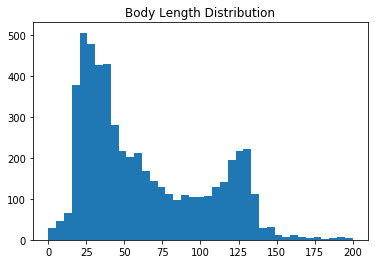

In [4]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

This distribution makes sense. We saw that spam were mostly long so those are the ones concentrated towards left. And real text are mostly short so those are the ones kind of concentrated towards right. So we see this bimodal distribution here with two different spikes. I wouldn't sat this is a great candidate for transformation because it's not really heavily skewed and there's not really any clear outliers. 

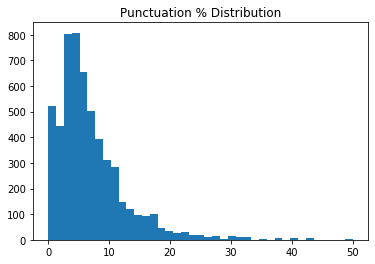

In [5]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

This one could very well be a nice distribution for a transformation. It's fairly skewed here where we see a lot close to zero and then we see this tail out here extending all the way up to 40 with some of these outliers out here. 

A model might dig too much into this skewed tail over here and generate a model maybe that's a little bit biased. We're going to focus on this feature for our transformations.